---------------------------------

### (Q1) Definite of Hessian Matrix
##### (曾勁松)
作業12裡面求解多變量函數時有需要用hessian matrix is positive or negative definite來判斷找到的解是minimizer或maximizer，

理論上是可以用特徵值是否來判斷是否為正定或負定，

但我在想會不會出現特徵值有正有負，也就是hessian matrix是indefinite的狀態？

如果hessian matrix可能是indefinite，那我們找到的解代表什麼意義呢？

### Ans

##### (王泓仁)
如果 Hessian is negative definite (all the eigenvalues are negative), 這表示這個函數在該點是 local maximum. 如果是 positive definite, 則是 local minimum. 如果是 indefinite (some of the eigenvalues are positive and some are negative), 則表示該點是個 saddle point，不算是求出了解。 

##### (申大昀)
我查到的也是特徵值皆為負，Hessian才是negative definite。

然後我也有查到另一種判斷矩陣是否為positive definite、negative definite的方法:

看矩陣的principal minors。(Principal minors就是一個矩陣最左上1*1, 2*2, 3*3, ..., k*k這幾個小矩陣的行列式)

如果k個principal minor都是正的，那矩陣就是positive definite；

如果k=1,3,5,..的principal minors都是負的，而k=2,4,6,...的principal minors都是正的，那矩陣就是negative definite。

如果上面這兩個條件都不符合，那矩陣就是indefinite。

---------------------------------

### (Q2) Empirical Hessian Matrix
##### (尚浩嶽)

在寫HW13及看影片的過程中有個小問題：如果我的理解沒有錯的話，Fisher Information Matrix可以寫作Negative Hessian取期望值的結果，而在Empirical的部分可以寫成每一筆觀察值的Negative Hessian相加，為什麼不需要除以觀察值的資料筆數呢？（因為是Empirical的期望值）且Negative Hessian取期望值這件事情好像也不用寫在code裡，因為筆記裡的相關程式碼是直接把Hessian取Inverse後就當成Omega Matrix了，不清楚是我哪裡理解有誤，謝謝大家！

### Ans
##### (王泓仁)
問題有兩部分：
- （1）Fisher information matrix 的公式是期望值，但為何其 empirical counterpart 直接把每個觀察值的 Hessian 相加，而沒有除以資料筆數？
- （2）講義為何可以直接把 Hessian 取 inverse 就當作 variance-covariance matrix.

有關第一個問題：

<div>
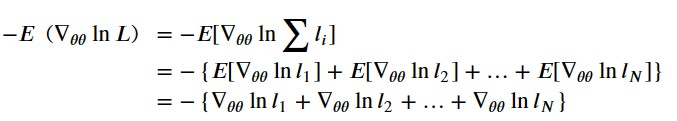
</div>

 

ChatGPT 有很好的解釋，我直接抄錄如下：

==== from ChatGPT =========

When calculating the empirical or observed Fisher information matrix from a set of observations, you would typically sum the individual observation-level derivatives, rather than taking the mean. 

This is because the empirical Fisher information matrix is essentially an estimate of the expected Fisher information matrix using the actual observed data. 

For example, let's say you have a sample of n=12 observations and a parameter vector θ. You would compute the information matrix I(θ) as follows:

1. Compute the second partial derivative of the log-likelihood (or the product of first derivatives) with respect to each parameter θ_i and θ_j for each observation. This will give you a 12 x k x k array (for k parameters).

2. Sum the derivative matrices across all observations. This will give you a single k x k matrix, which is your empirical Fisher information matrix.

Remember, the Fisher information matrix provides a measure of how much information your data carries about the parameters of your model, on average. By summing across all observations, you are effectively averaging the information across your data sample. Taking the sum rather than the mean makes sense because it reflects the accumulation of information from each additional data point. The more data points you have, the more information you have about the parameters.

In essence, the observed information matrix is calculated based on the actual data, while the Fisher information matrix is calculated based on all possible outcomes of the data (hence the expectation).

====================


有關第二個問題：因為 `Optim` 套件已經幫我們把 Hessian 算好了，就是它已經把每個觀察值的 Hessian 相加了，我們直接用就可以。我本來想讓你們手動寫程式，後來想算了。

---------------------------------
### (Q3)  `:ForwardDiff` error message
##### (尚浩嶽)

老師及各位同學好：

在做HW14時遇到了一個小問題，就是當我在function內執行ui的隨機抽樣時，總會有一個error出現，在網上查詢無果且甚至不知道也沒查到這個error中所提到的函數randnt是什麼之後，決定上來發問；但我目前將此段程式改成Inverse Transform Sampling的抽樣，並且改完後就可以跑出正確的MSLE結果了，但還是想詢問大家！

MWE內容如下：

```Julia
S = 2^10 - 1
rng = Xoshiro(123)
d = truncated(Normal(0, sqrt(sigma_u^2)), lower=0)
u_list = rand(rng, d, S)
```

當我把這段抽樣程式碼放入function去進行Optimize時，出現以下error：
```
MethodError: no method matching randnt(::Xoshiro, ::ForwardDiff.Dual{ForwardDiff.Tag{var"#6#7", Float64}, Float64, 9}, ::ForwardDiff.Dual{ForwardDiff.Tag{var"#6#7", Float64}, Float64, 9}, ::ForwardDiff.Dual{ForwardDiff.Tag{var"#6#7", Float64}, Float64, 9})

Closest candidates are:
  randnt(::AbstractRNG, ::Float64, ::Float64, ::Float64) at C:\Users\User\.julia\packages\Distributions\rWYRC\src\truncated\normal.jl:158
```
以上，感謝大家！

### Ans

###### (王泓仁)
這個錯誤訊息是出現在某種資料形態、沒辦法接受 dual number type 的時候；而 dual number type 是 ForwardDiff (automatic differentiation) 需要的資料形態。因此這個錯誤訊息基本上就是說，你的指令中出現了沒辦法被 ForwardDiff 處理的資料形態（ForwardDiff 要 pass 這個 dual number type 給它，但它無法接受）。你可以試試看，取消 autodiff = :forward ，也就是直接用 numerical finite difference, 就不會有這個錯誤訊息。

浩嶽基本上指出這次作業的關鍵了！

---------------------------------
###  (Q4)  Hessian 不對稱的問題

##### (劉浩揚)

想請問一下各位，照理來說Hessian為二次微分應該是對稱矩陣，但我在這次作業定義`TwiceDifferentiable()`的時候把`autodiff = :forward`去掉，使用`Optim.hessian!()`時會計算出不對稱的Hessian matrix，感覺上是數值上計算錯誤，但在係數估計上，有沒有加`autodiff = :forward`又不影響結果，所以想問問大家是什麼原因，感謝。

首先我在定義函數為二次微分時把`autodiff = :forward`去掉

<div>
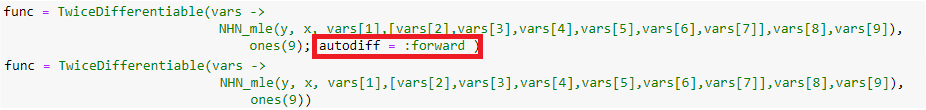
</div>

而這是原本的結果(中間三行有點多餘不要理會):

<div>
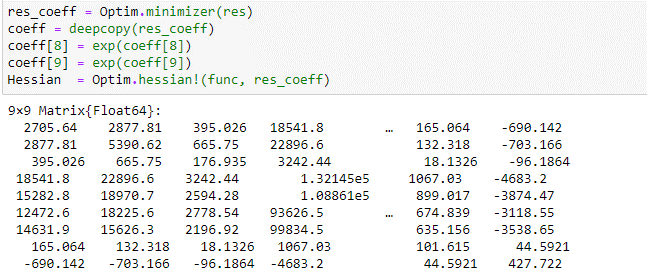
</div>

這是去掉`autodiff = :forward`的結果


<div>
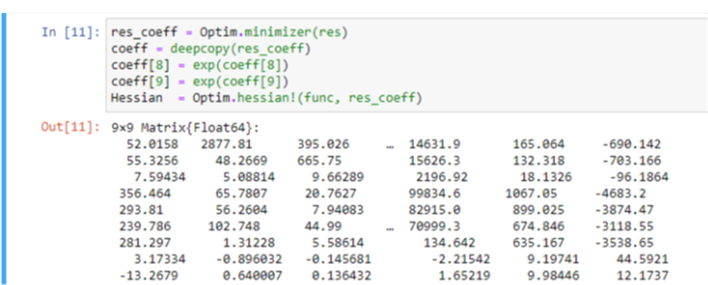
</div>

### Ans
##### (王泓仁)
浩揚的問題和我原來想的不一樣。浩揚上面貼的結果，我覺得應該是原來的估計就不正確、或沒收斂，才會有這樣的 Hessian. 建議浩揚先檢查 likelihood function, 然後確定參數的估計有正確收斂，再來處理 Hessian 的問題。

歡迎繼續討論，不要貼出作業的答案即可。

##### (劉浩揚)
真的是收斂上的問題我沒注意到....好像是我tolerate設太小了，改大一點後就能得到一致的結果

---------------------------------
### (Q5) The Bug of `Optim`

##### (曾勁松)

各位同學和老師好，

我在做HW14的時候，最後被回報了這個結果。

從g(x)是可以判斷最後沒有收斂，但status又說是success，有點不確定這是代表我處在什麼狀態。

<div>
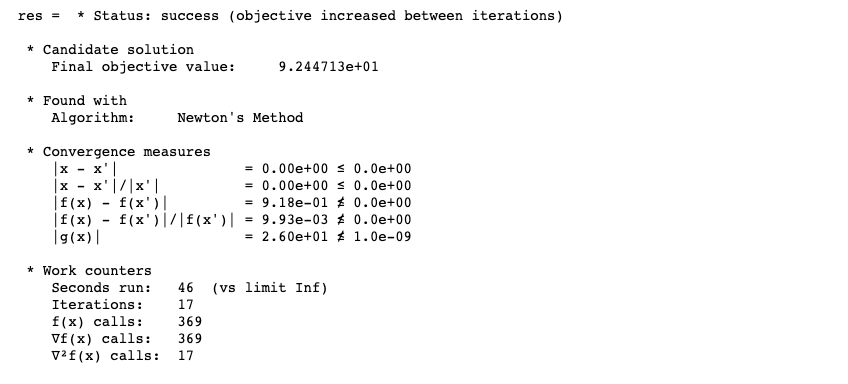
</div>

### Ans
##### (王泓仁)
我也覺得 `Optim` 的處理很奇怪。這也是為什麼我先前請你們要檢查 graident 的大小是否真的很小，來判斷是否真的收斂，而不能單靠 Julia 的判斷。這應該是一個 bug, 改天有時間回報一下。

``` julia
## 檢查grediant的大小

if isnan(Optim.g_residual(func)) || (Optim.g_residual(func) > 1e-7) 
    println("The gradients are problematic. There is a problem in the convergence. See below.\n")
    @show hwk14 
    @show Optim.minimizer(hwk14)
    throw("try again")
end 
```

---------------------------------

### (Q6)  var-cov matrix 的對角線有負數，因此無法開根號

##### (潘家栩)

大家可能會遇到hessian不對稱的問題（因為我也遇到^_^），以下是靠偉大的google找到可能的解決方法（啦

https://discourse.julialang.org/t/highly-asymmetric-hessian-after-optimization/26027

老師我原本寫這次作業的步驟大致上是按HW13的流程來得的，在上次作業裡我能很「簡單」地把var-cov-matrix對方線的variance拿出來算str error，但HW14時我發現我照著上次的步驟會出現variance是負數的情況（顯示是不合理吧），所以我進一步觀察套件幫我算出來的hessian，才發現不對稱的問題，不過老師的程式碼會算到不對稱的原因我目前還不清楚（我可能也要先試看看）

### Ans 
##### (王泓仁)

如果你的問題發生在「var-cov matrix 的對角線有負數，因此無法開根號」，這現象可以確定與 Hessian 是否對稱無關、不能用 hessian!! 解決，而它代表的是更嚴重的問題，即此估計沒有收斂成功。

#### 1. 與 Hessian 是否對稱無關

對稱與否是由 off-diagonal 的 elements 來看，與對角線本身無關。一個非對稱的矩陣，對角線仍然可能為正或為負。對稱的亦然：對稱矩陣不保證對角線一定為正。

#### 2. 不能用 hessian!! 解決

網路討論串提到的問題，在 Optim 的新版已經解決了。你用 hessian!! 「恰好」得到一個對角線可以開根號的矩陣，只是剛好而已。

#### 3. 估計沒有收斂成功

這其實就是隔壁樓曾勁松同學提到的問題。我看了你的程式；你可以列印 res1, 就可以發現問題。正常收斂的結果是這樣：

<div>
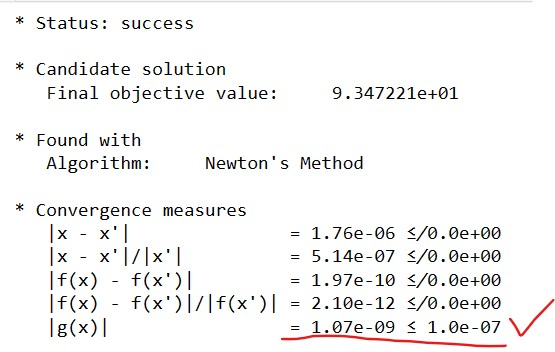
</div>

而你的不正常收斂的結果是這樣：

<div>
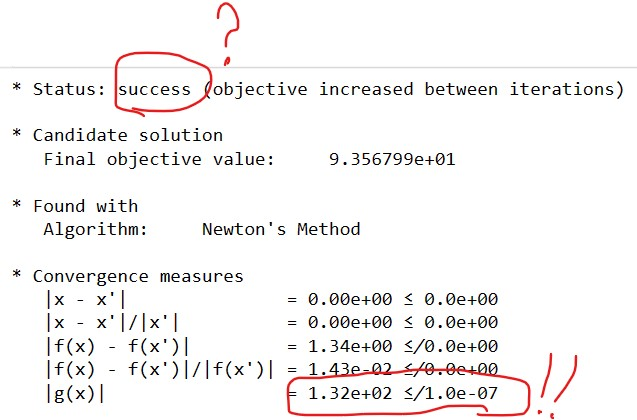
</div>

可以看到， gradient 的 norm 事實上非常大！Optim 在這裏應該有 bug. 這也是我以前告訴各位，一定要 check 那個 gradient 的 norm. 這個 gradient 的 norm 可以直接從 `Optim` 的估計結果中叫出來，大家查一下（或問 ChatGPT) 就可以知道指令。

 

#### 4. 怎麼辦？幾個可能性。

（1）改變你的 u_list 的 random draw. 最好的方式就是給 `rand()` 一個  RNG, 例如 Xoshiro(123). 如果這個仍不行，換個數字，變124, 之類的。

（2）改變 random draw 的數量。例如，從 2^10-1 變成 2^11-1. 

我喜歡第一個做法。